# Downloading the Dataset
In case you are reproducing my work but do not already have the dataset in the `data` folder, you can uncomment the line below to download the dataset automatically.

In [ ]:
#!wget --header="Host: homepages.cs.ncl.ac.uk" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,el-CY;q=0.8,el;q=0.7" --header="Cookie: s_pers=%20c19%3Dsd%253Abrowse%253Ajournal%253Aarchive%7C1555442137734%3B%20v68%3D1555440337610%7C1555442137766%3B%20v8%3D1555440341683%7C1650048341683%3B%20v8_s%3DFirst%2520Visit%7C1555442141683%3B; _fbp=fb.2.1597569580627.2097973549; hubspotutk=824e8b916d8cf9de444df6ef0a43e151; _hjid=dcd76b92-ce2c-4156-83b1-3e36493bd740; __utma=156832676.2033509495.1597569580.1632761823.1632766611.7; __utmz=156832676.1632766611.7.4.utmcsr=s3p.ncl.ac.uk|utmccn=(referral)|utmcmd=referral|utmcct=/; _hjSessionUser_397130=eyJpZCI6ImY0Y2M5YTE5LWJlYjItNWI3ZC1hZDU5LWM1ZTgyN2NjMTM3OCIsImNyZWF0ZWQiOjE2Mzc0MzAyNjExNTksImV4aXN0aW5nIjp0cnVlfQ==; _gcl_au=1.1.1153580045.1643114673; _gid=GA1.3.526214022.1644876318; _uetsid=31d431c08de211ec94408d43247b5702; _uetvid=bfd8f920c7ca11eba759ad50ff4cbb72; __hstc=105933084.824e8b916d8cf9de444df6ef0a43e151.1619097487946.1644927904530.1645005902569.44; _clck=xotj0h|1|ez1|0; _clsk=wvbhm1|1645005903877|1|1|d.clarity.ms/collect" --header="Connection: keep-alive" "http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/birds.zip" -c -O 'data/CurlWget1985'

--2022-02-26 15:53:51--  http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/birds.zip
Resolving homepages.cs.ncl.ac.uk (homepages.cs.ncl.ac.uk)... 128.240.212.24
Connecting to homepages.cs.ncl.ac.uk (homepages.cs.ncl.ac.uk)|128.240.212.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658039182 (1.5G) [application/zip]
Saving to: ‘CurlWget1985’

CurlWget1985        100%[===================>]   1.54G  6.62MB/s    in 4m 12s  

2022-02-26 15:58:03 (6.29 MB/s) - ‘CurlWget1985’ saved [1658039182/1658039182]



# Unzipping the Dataset in the `data` directory of this Task
If you have ran the previous line and now want to unzip the dataset in the `data` directory, you can uncomment the line below to do that automatically.

In [ ]:
#!cd data; unzip CurlWget1985

Streaming output truncated to the last 5000 lines.
  inflating: train/TEAL DUCK/112.jpg  
  inflating: train/TEAL DUCK/113.jpg  
  inflating: train/TEAL DUCK/114.jpg  
  inflating: train/TEAL DUCK/115.jpg  
  inflating: train/TEAL DUCK/116.jpg  
  inflating: train/TEAL DUCK/117.jpg  
  inflating: train/TEAL DUCK/118.jpg  
  inflating: train/TEAL DUCK/119.jpg  
  inflating: train/TEAL DUCK/120.jpg  
  inflating: train/TEAL DUCK/121.jpg  
  inflating: train/TEAL DUCK/122.jpg  
  inflating: train/TEAL DUCK/123.jpg  
  inflating: train/TEAL DUCK/124.jpg  
  inflating: train/TEAL DUCK/125.jpg  
  inflating: train/TEAL DUCK/126.jpg  
  inflating: train/TEAL DUCK/127.jpg  
  inflating: train/TEAL DUCK/128.jpg  
  inflating: train/TEAL DUCK/129.jpg  
  inflating: train/TEAL DUCK/130.jpg  
  inflating: train/TEAL DUCK/131.jpg  
  inflating: train/TEAL DUCK/132.jpg  
  inflating: train/TEAL DUCK/133.jpg  
  inflating: train/TEAL DUCK/134.jpg  
  inflating: train/TEAL DUCK/135.jpg  
  inflating: 

In [ ]:
import random
# setting a seed for reproducibility of results
random.seed(10)

# Loading the Dataset into the workspace
I am loding the dataset from my personal Azure workspace. If you have not followed the steps above, then please make sure to **CHANGE the PATHS** below to your corresponding directory in which you keep the unzipped "train", "test" and "valid" folders of the dataset.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create a data generator
datagen = ImageDataGenerator(rescale=1/255)

# load and iterate training dataset
train_it = datagen.flow_from_directory("data/train/",
                                       class_mode='categorical', batch_size=32, target_size=(180, 180))
# load and iterate validation dataset
val_it = datagen.flow_from_directory("data/valid/",
                                     class_mode='categorical', batch_size=32, target_size=(180, 180))
# load and iterate test dataset
test_it = datagen.flow_from_directory("data/test/",
                                      class_mode='categorical', batch_size=32, target_size=(180, 180))

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


# Transfer Learning
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. ([resource](https://www.tensorflow.org/guide/keras/transfer_learning#the_typical_transfer-learning_workflow))

In [ ]:
#importing required libraries
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers, optimizers, losses, metrics, callbacks, initializers

### Instantiating base model with pre-trained weights and freezing it

In [ ]:
# Create base model
base_model = Xception(input_shape = (180,180,3),
                      weights = 'imagenet',
                      include_top = False)
# Freeze base model
base_model.trainable = False

### Creating a new model on top of the base model

In [ ]:
# specifying the input shape of the data that is passed to the model
inputs = Input(shape=(180,180,3))
# We make sure that the base_model is running in inference mode here, 
# by passing "training=False". This is important for fine-tuning.
x = base_model(inputs, training = False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = layers.GlobalAveragePooling2D()(x)
# An output dense layer for classifier with 250 classes
outputs = layers.Dense(250, activation='softmax', name= 'outputs')(x)
# setting up the model
model = Model(inputs= [inputs], outputs= [outputs])

### Compiling the model

In [ ]:
model.compile(optimizer=optimizers.Adam(),
              metrics=[metrics.CategoricalAccuracy(name='accuracy')], 
              loss=losses.CategoricalCrossentropy())

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 outputs (Dense)             (None, 250)               512250    
                                                                 
Total params: 21,373,730
Trainable params: 512,250
Non-trainable params: 20,861,480
_________________________________________________________________


### Fitting the model

In [ ]:
history = model.fit(train_it,
                    validation_data=val_it,
                    epochs=10)

Epoch 1/10
1101/1101 [==============================] - 139s 123ms/step - loss: 1.1247 - accuracy: 0.7357 - val_loss: 0.3830 - val_accuracy: 0.9056
Epoch 2/10
1101/1101 [==============================] - 134s 122ms/step - loss: 0.4528 - accuracy: 0.8753 - val_loss: 0.3241 - val_accuracy: 0.9080
Epoch 3/10
1101/1101 [==============================] - 134s 122ms/step - loss: 0.3100 - accuracy: 0.9150 - val_loss: 0.2867 - val_accuracy: 0.9160
Epoch 4/10
1101/1101 [==============================] - 134s 122ms/step - loss: 0.2325 - accuracy: 0.9366 - val_loss: 0.2552 - val_accuracy: 0.9336
Epoch 5/10
1101/1101 [==============================] - 134s 122ms/step - loss: 0.1771 - accuracy: 0.9524 - val_loss: 0.2378 - val_accuracy: 0.9304
Epoch 6/10
1101/1101 [============================

# Fine-Tuning

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# Recompiling the model after making changes to the `trainable` attribute of the inner layer,
# so that the changes are take into account
model.compile(optimizer=optimizers.Adam(1e-5),  # Very low learning rate
              metrics=[metrics.CategoricalAccuracy(name='accuracy')], 
              loss=losses.CategoricalCrossentropy())

# Training the model for 10 more epochs.
history_ft = model.fit(train_it,
                       epochs=10,
                       validation_data=val_it)

Epoch 1/10
1101/1101 [==============================] - 716s 645ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.1707 - val_accuracy: 0.9600
Epoch 2/10
1101/1101 [==============================] - 707s 642ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.1929 - val_accuracy: 0.9536
Epoch 3/10
1101/1101 [==============================] - 708s 643ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.1739 - val_accuracy: 0.9632
Epoch 4/10
1101/1101 [==============================] - 708s 643ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.1761 - val_accuracy: 0.9632
Epoch 5/10
1101/1101 [==============================] - 706s 641ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.2091 - val_accuracy: 0.9600
Epoch 6/10
1101/1101 [

## Saving the model

In [ ]:
model.save('trained-models/light-model-2.h5')

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# Evaluating the Results

## Testing the model to see the final Loss and Accuracy values

In [ ]:
model_result=model.evaluate(test_it)
print("The loss of the model is: ",model_result[0], "\nThe accuracy of the model is: ",model_result[1])

40/40 [==============================] - 5s 118ms/step - loss: 0.1006 - accuracy: 0.9760
The loss of the model is:  0.10060293227434158 
The accuracy of the model is:  0.9760000109672546


## Plotting the Loss and Accuracy
Lets now plot these values to get a better picture of what happened throughout the epochs, before and after applying fine tunning

In [ ]:
# importing required library
import matplotlib.pyplot as plt

#### Calculating Accuracy ####

# Extracting the train and validation accuracy before fine-tunning
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

# Extracting the train and validation accuracy after fine-tunning
train_accuracy_ft=history_ft.history['accuracy']
val_accuracy_ft=history_ft.history['val_accuracy']

# Extracting the train and validation accuracy before fine-tunning
epochs=range(1,len(history.history['loss'])+1)


#### Calculating Loss ####

# Extracting the train and validation loss before fine-tunning
train_loss=history.history['loss']
val_loss=history.history['val_loss']

# Extracting the train and validation loss after fine-tunning
train_loss_ft=history_ft.history['loss']
val_loss_ft=history_ft.history['val_loss']

# Extracting the train and validation accuracy after fine-tunning
epochs_ft=range(1,len(history_ft.history['loss'])+1)

### Accuracy curves before and after Fine-Tunning

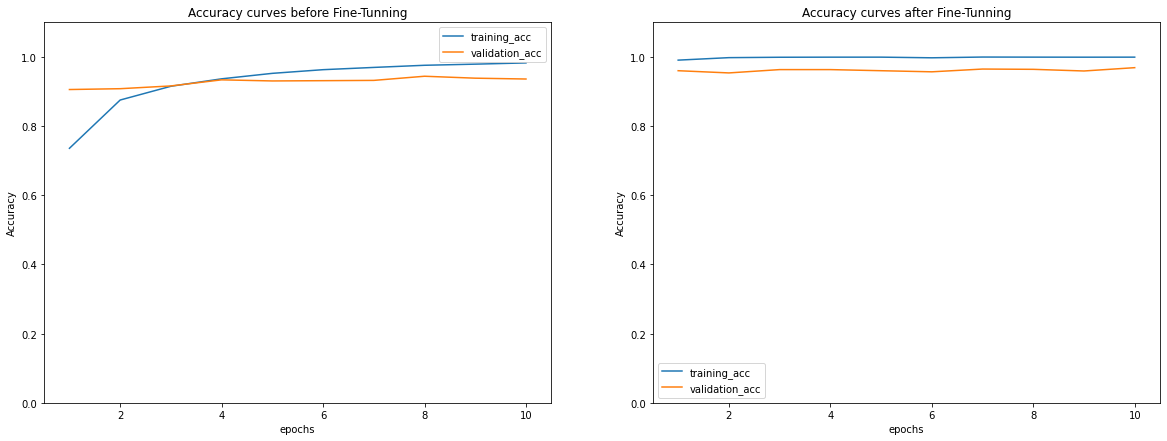

In [ ]:
plt.figure(figsize=(20,7))

# plot accuracy data before fine-tunning
plt.subplot(1,2,1)
plt.plot(epochs,train_accuracy,label="training_acc")
plt.plot(epochs,val_accuracy,label="validation_acc")
plt.title("Accuracy curves before Fine-Tunning")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.axis([0.5, 10.5, 0, 1.1])
plt.legend()

# plot accuracy data after fine-tunning
plt.subplot(1,2,2)
plt.plot(epochs_ft,train_accuracy_ft,label="training_acc")
plt.plot(epochs_ft,val_accuracy_ft,label="validation_acc")
plt.title("Accuracy curves after Fine-Tunning")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.axis([0.5, 10.5, 0, 1.1])
plt.legend()


### Loss Curves before and after Fine-Tunning

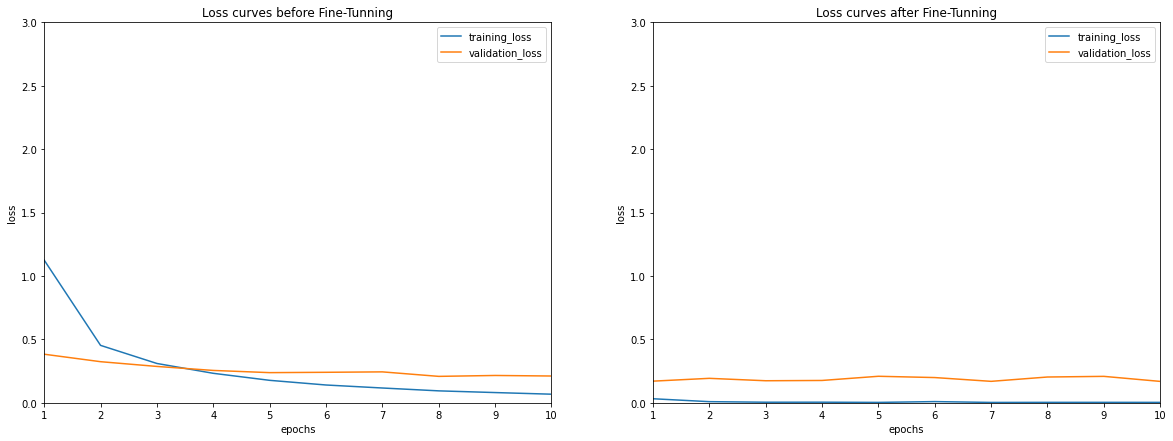

In [ ]:
plt.figure(figsize=(20,7))

# plot loss data before fine-tunning
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,label="training_loss")
plt.plot(epochs,val_loss,label="validation_loss")
plt.title("Loss curves before Fine-Tunning")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.axis([1, 10, 0, 3])
plt.legend()

# plot loss data
plt.subplot(1,2,2)
plt.plot(epochs_ft,train_loss_ft,label="training_loss")
plt.plot(epochs_ft,val_loss_ft,label="validation_loss")
plt.title("Loss curves after Fine-Tunning")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.axis([1, 10, 0, 3])
plt.legend()


You can uncomment the code in the cell below to load the model and re-run the evaluation/testing phase of this task.

In [ ]:
from tensorflow import keras
model = keras.models.load_model("trained-models/light-model-2.h5")

### Finding the Percision and Recall metrics

Getting the ground truth and predicted labels from the model

In [ ]:
import numpy as np

# getting the ground truth labels
y_true = test_it.labels

# getting the predicted labels
y_pred = model.predict(test_it)
y_pred = np.argmax(y_pred, axis=1)

Producing the "recall score" and "percision score" metrics

In [ ]:
from sklearn.metrics import recall_score, precision_score

# getting the recall score
recall = recall_score(y_true, y_pred, average='weighted')
print("The recall for this classifier is", recall)

precision_score = precision_score(y_true, y_pred, average='weighted')
print("The precision score for this classifier is", precision_score)

The recall for this classifier is 0.0032
The precision score for this classifier is 0.0032666666666666664


## Plotting a Confusion Matrix


Text(33.0, 0.5, 'Actual Labels')

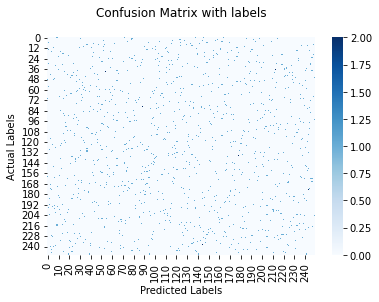

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#y_true = np.argmax(y_true, axis =1)
confusion_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred )

# plotting the confusion matrix for the model label prediction
ax = sns.heatmap(confusion_matrix, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')


# Image Classification (DEMO TEST)

In [ ]:
import pandas as pd

from tensorflow import keras

# loading the model
model = keras.models.load_model('models/light-model-2.h5')

# loading the test image/s
test_extra = datagen.flow_from_directory("/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-csc8637-b8035526/code/Users/b8035526/Assignment/Task2/data/extra",
                                      class_mode='categorical', batch_size=1, target_size=(180, 180))

# predicting the class of the test image
test_pred = model.predict(test_extra)
test_classes = test_pred.argmax(axis=1)

# matching the predicted class label/s to the class indices (class name/s) of all the birds used in training
l = dict((v,k) for k,v in train_it.class_indices.items())
prednames = [l[k] for k in test_classes]

# printing my predictions
finaldf = pd.DataFrame({'Prediction': prednames})

print (finaldf)